In [1]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

Using cache found in C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Bereket\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  23.2s, installed 1 package: ['gitpython>=3.1.30']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2024-11-17 Python-3.12.0 torch-2.5.1+cpu CPU

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


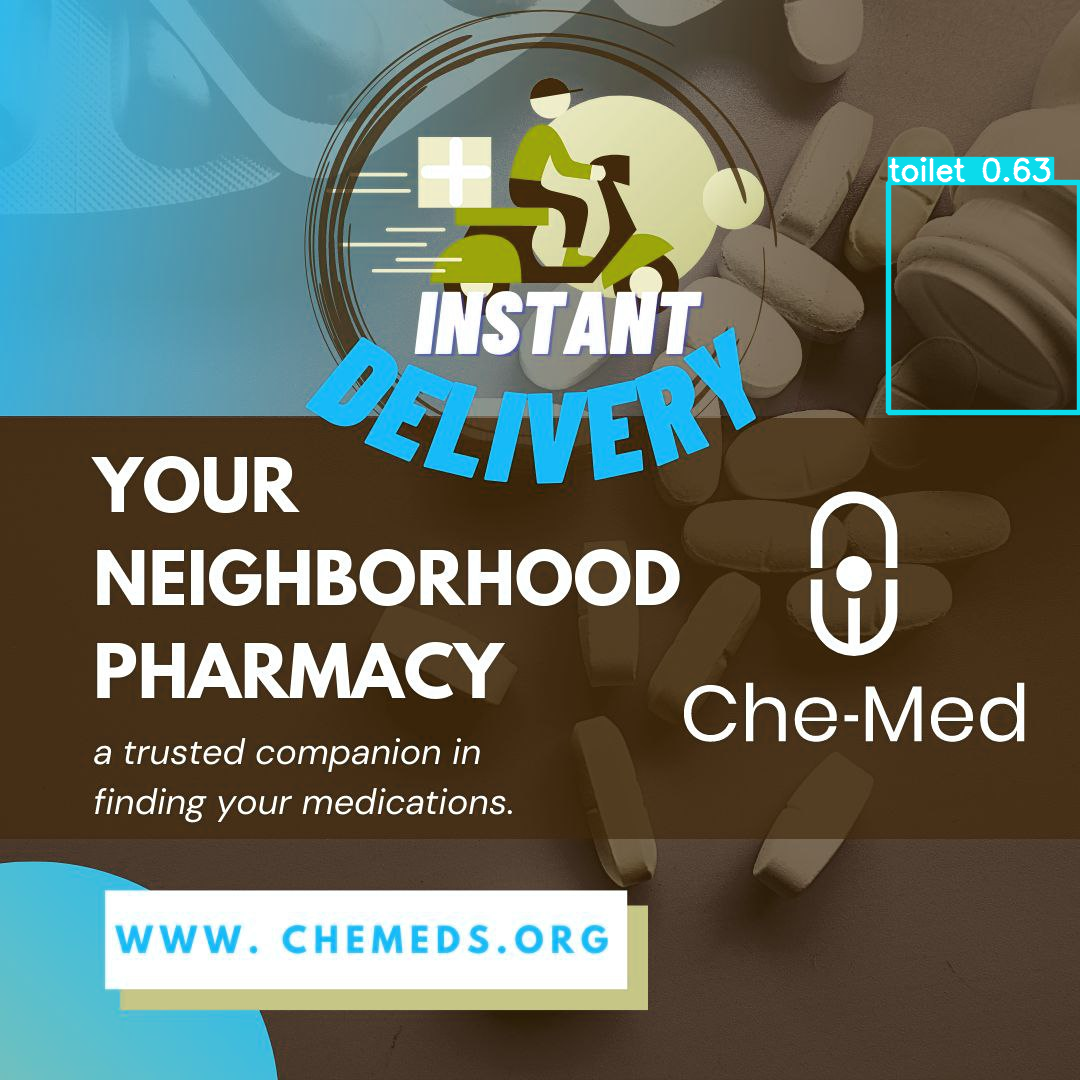

Saved 1 image to detection_results
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


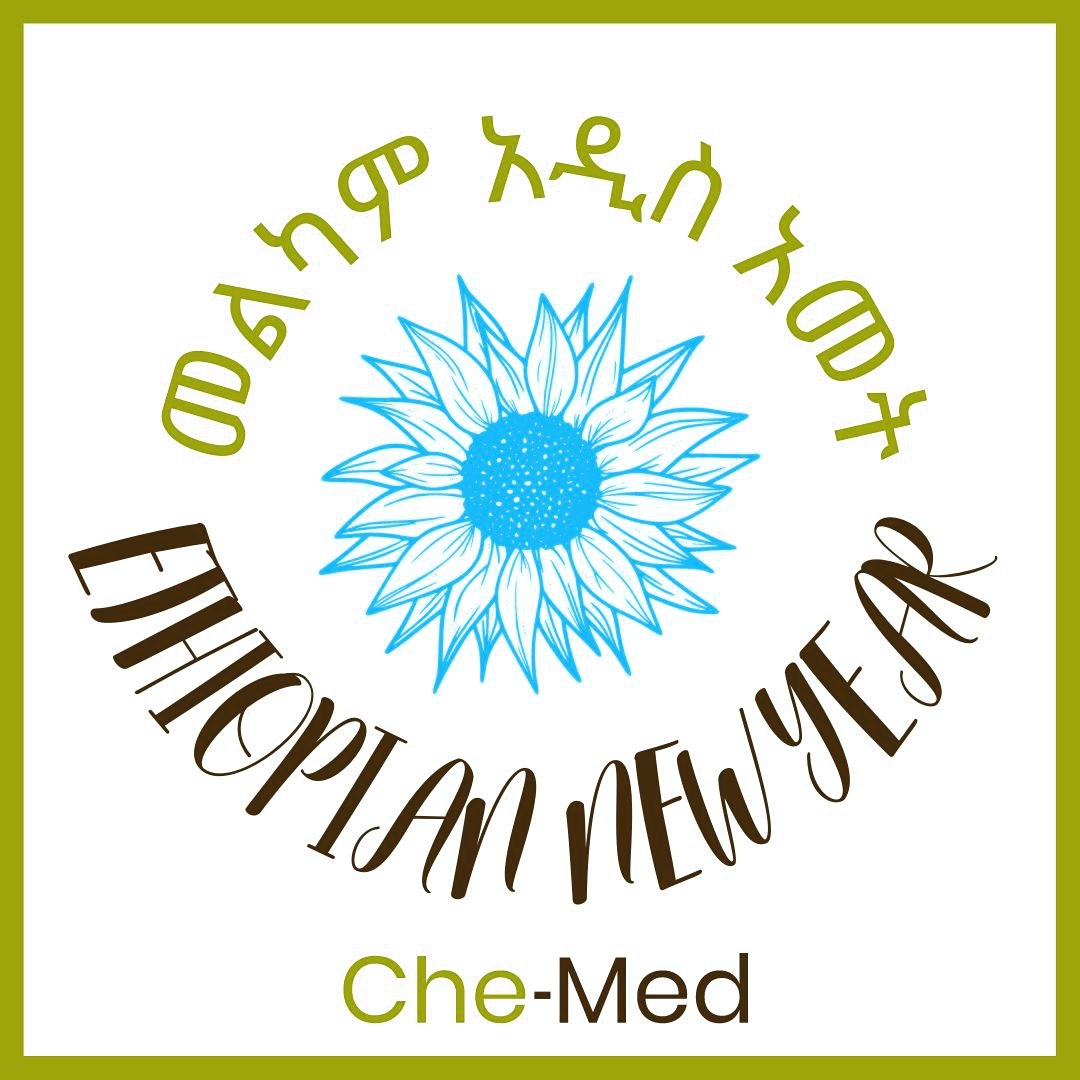

Saved 1 image to detection_results2
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


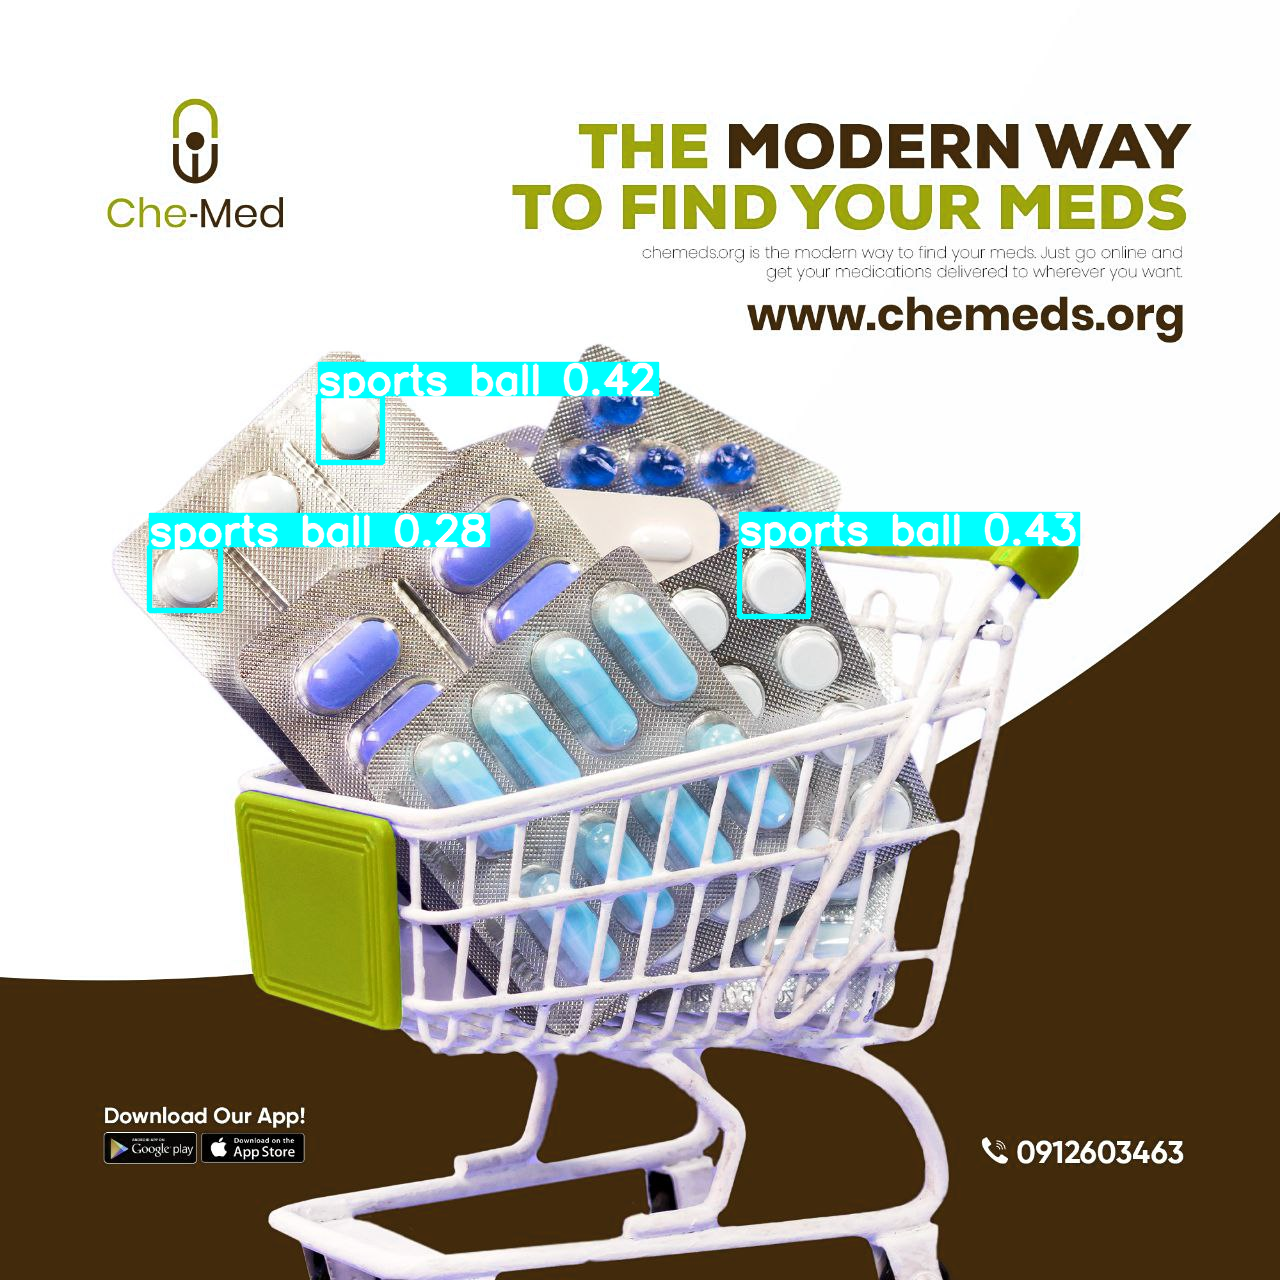

Saved 1 image to detection_results3
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


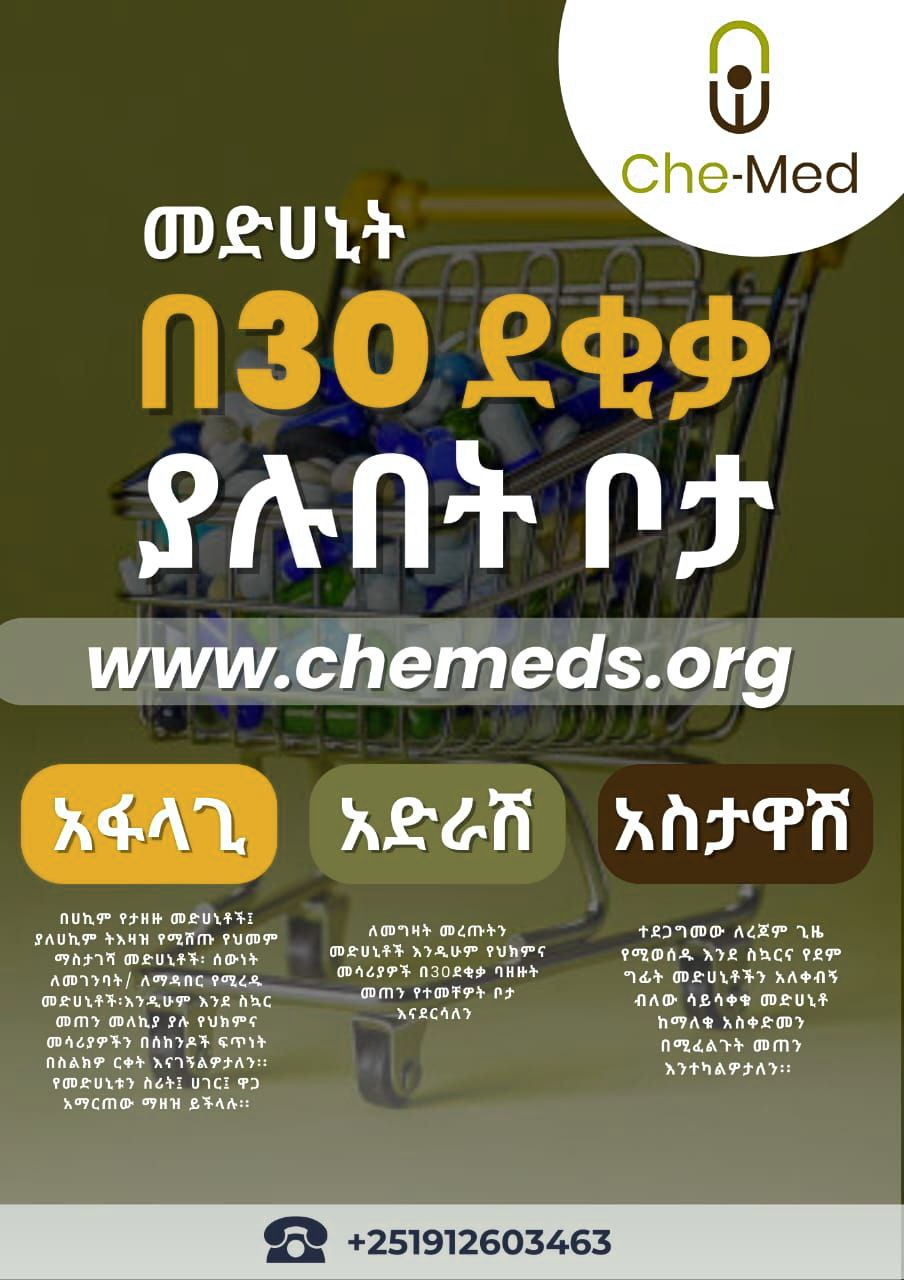

Saved 1 image to detection_results4
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


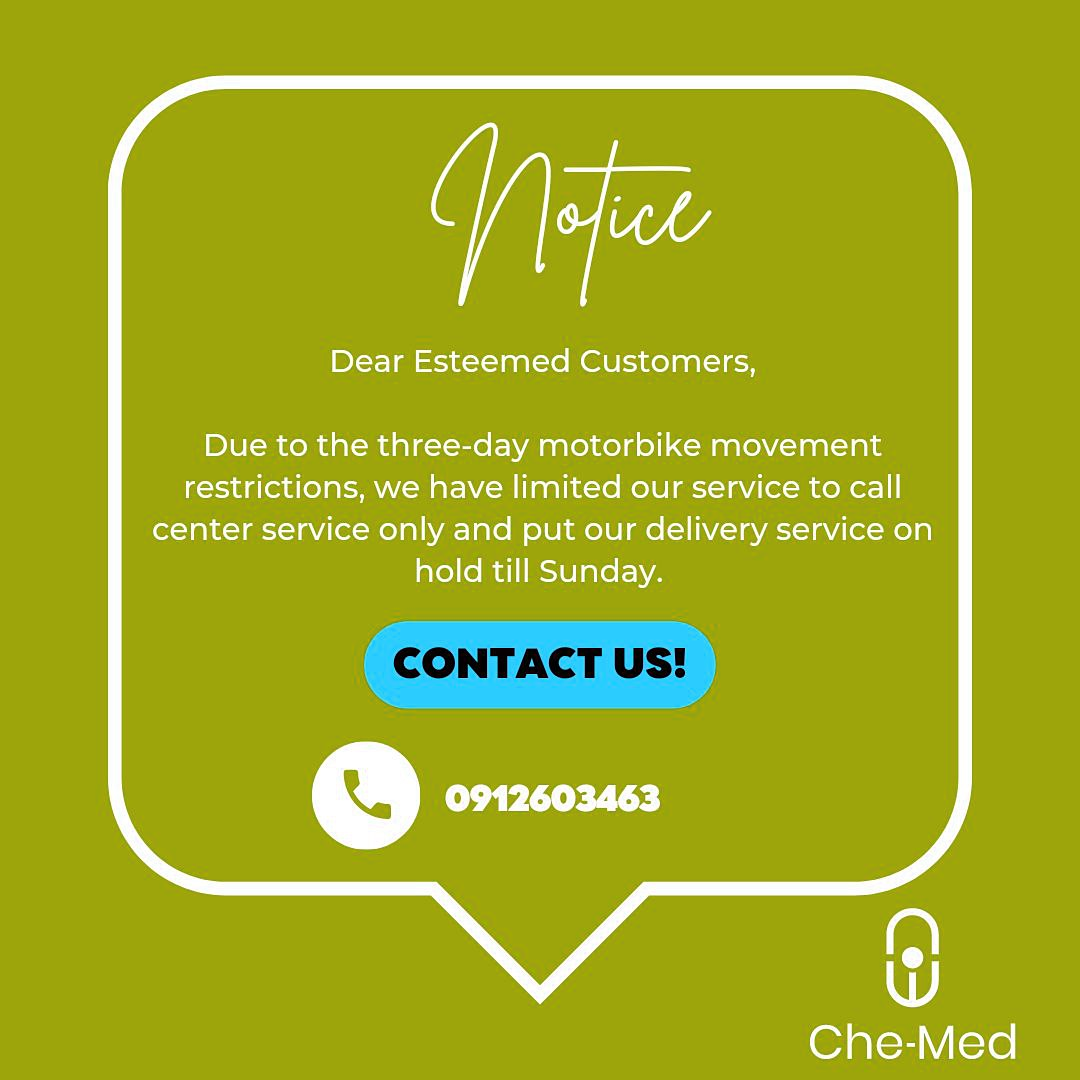

Saved 1 image to detection_results5
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


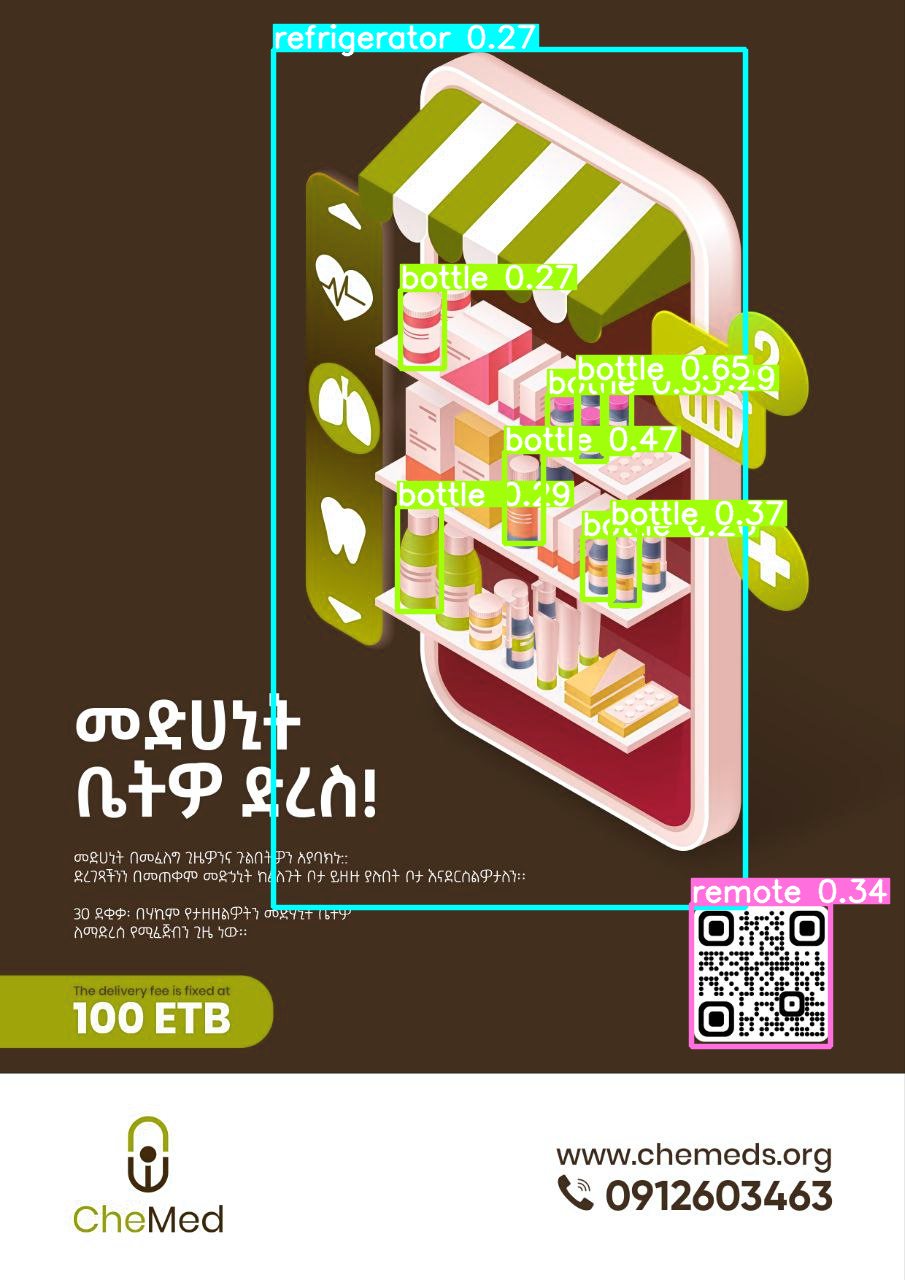

Saved 1 image to detection_results6
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


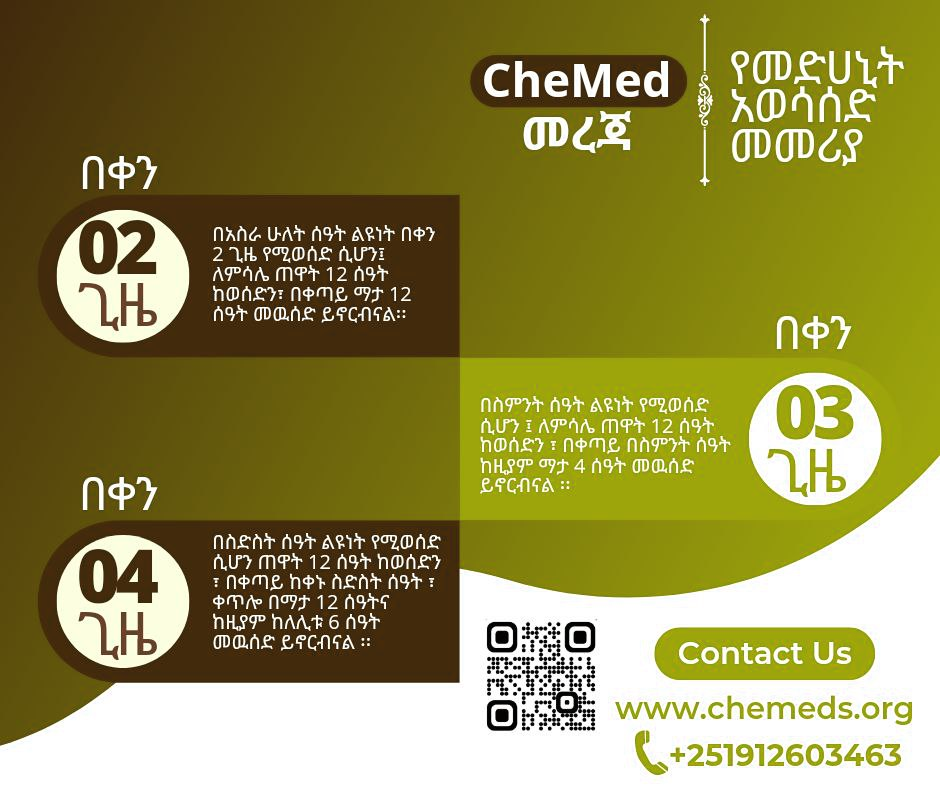

Saved 1 image to detection_results7


In [ ]:
import torch
import cv2
import os

# Load pre-trained YOLOv5 model (use YOLOv5s, YOLOv5m, YOLOv5l, or YOLOv5x as needed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # You can switch 'yolov5s' with 'yolov5m', 'yolov5l', or 'yolov5x'

# Path to the directory containing the images from the Chemed Telegram Channel
image_folder = '../photos'

# Loop through the images in the folder and run object detection
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Run object detection
    results = model(img)

    # Show the results
    results.show()  # Show detected objects on the image
    results.save(save_dir='detection_results/')  # Save detection results to a directory


In [5]:
import torch
import cv2
import os
import psycopg2
import pandas as pd

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Path to the directory containing the images
image_folder = '../photos'

# Connect to PostgreSQL database
conn = psycopg2.connect(
    dbname="md_data",
    user="postgres",
    password="1234",
    host="localhost",  # Or the IP address of your database server
    port="5432"        # Default PostgreSQL port
)
cursor = conn.cursor()

# Create a table for storing detection results (if not already created)
cursor.execute('''
CREATE TABLE IF NOT EXISTS detections (
    id SERIAL PRIMARY KEY,
    image_name VARCHAR(255),
    class_name VARCHAR(255),
    confidence FLOAT,
    x_min FLOAT,
    y_min FLOAT,
    x_max FLOAT,
    y_max FLOAT
)
''')
conn.commit()

# Process images and store detection results
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    # Read the image
    img = cv2.imread(img_path)

    # Run object detection
    results = model(img)

    # Extract detection results as a DataFrame
    df = results.pandas().xyxy[0]  # Bounding boxes, confidence scores, class names

    # Add the image name to the DataFrame
    df['image_name'] = img_name

    # Insert each detection into the database
    for _, row in df.iterrows():
        cursor.execute('''
        INSERT INTO detections (image_name, class_name, confidence, x_min, y_min, x_max, y_max)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
        ''', (
            row['image_name'],
            row['name'],  # Object class name
            row['confidence'],
            row['xmin'],
            row['ymin'],
            row['xmax'],
            row['ymax']
        ))
    conn.commit()

# Close the database connection
conn.close()

print("Detection results stored in the PostgreSQL database.")


Using cache found in C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-17 Python-3.12.0 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Bereket/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Bereket/.cache\torch\hub\ultralytic

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:813: error: (-215:Assertion failed) !buf.empty() in function 'cv::imdecode_'


In [6]:
import os

def parse_detection_results(result_folder):
    results = []
    label_folder = os.path.join(result_folder, "labels")

    for label_file in os.listdir(label_folder):
        if label_file.endswith(".txt"):
            image_name = label_file.replace(".txt", ".jpg")  # Assuming input images are .jpg
            label_path = os.path.join(label_folder, label_file)
            
            with open(label_path, "r") as file:
                for line in file:
                    class_id, center_x, center_y, width, height, confidence = map(float, line.strip().split())
                    results.append({
                        "image_name": image_name,
                        "class_id": int(class_id),
                        "center_x": center_x,
                        "center_y": center_y,
                        "width": width,
                        "height": height,
                        "confidence": confidence,
                    })
    return results

results = parse_detection_results('detection_results/')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'detection_results/labels'

In [2]:
print(f"Processing image: {img_path}")


Processing image: ../photos\@EAHCI_1858.jpg
